In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path='../JSON Files'

In [2]:
from os import listdir
from os.path import isfile,join
# putting all file paths in jsonfiles
jsonfiles = [f for f in listdir(path) if isfile(join(path,f))]

In [3]:
rcb="Royal Challengers Bangalore"
kxip="Kings XI Punjab"
pbks="Punjab Kings"

### Separate RCB matches for 2016 and KXIP matches for 2018-2021

In [4]:
def getMatches(year,team):
    matches=[]
    for file in jsonfiles:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        split=date[0].split('-')
        year_str=split[0]
        year_int=int(year_str)
        if year_int==year:
            innings=data.get('innings')
            for inning in innings:
                if inning.get('team')==team:
                    matches.append(file)
    matches=list(set(matches))
    return matches

In [5]:
matches_2016=getMatches(2016,rcb) #contains all rcb matches 
matches_2018=getMatches(2018,kxip) #contains all kxip matches
matches_2019=getMatches(2019,kxip) #contains all kxip matches
matches_2020=getMatches(2020,kxip) #contains all kxip matches
matches_2021=getMatches(2021,pbks) #contains all kxip matches

print(len(matches_2016))
print(len(matches_2018))
print(len(matches_2019))
print(len(matches_2020))
print(len(matches_2021))

16
14
14
14
14


In [6]:
batsman='KL Rahul'

In [7]:
def get_details(files,team):
    score_arr=[]
    balls_arr=[]
    pos_arr=[]
    out_arr=[]
    for file in files:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        players=info.get('players')
        team_players=players.get(team)
        index=-1
        if batsman in team_players:
            index=team_players.index(batsman)
            innings=data.get('innings')
            for i in range(0,2):
                inning=innings[i]
                score=0
                balls=0
                out=0
                batted=False
                if inning.get('team')==team:
                    overs=inning.get('overs')
                    for over in overs:
                        for delivery in over.get('deliveries'):
                            if delivery.get('batter')==batsman or delivery.get('non_striker')==batsman:
                                batted=True
                                runs=delivery.get('runs')
                                if delivery.get('batter')==batsman:
                                    if delivery.get('extras') and delivery.get('extras').get('wides'):
                                        continue
                                    score=score+runs.get('batter')
                                    balls=balls+1
                                    if 'wickets' in delivery:
                                        wickets=delivery.get('wickets')
                                        for wicket in wickets:
                                            if wicket.get('player_out')==batsman:
                                                out=1
                    if batted:
                        score_arr.append(score)
                        balls_arr.append(balls)
                        pos_arr.append(index+1)
                    else:
                        score_arr.append(0)
                        balls_arr.append(0)
                        pos_arr.append(-1)
                        out=0
                    out_arr.append(out)
    return score_arr,balls_arr,pos_arr,out_arr

In [8]:
score,balls,position,out=get_details(matches_2016,rcb) #details of 2016
col={'score':score,'balls':balls,'position':position,'out':out}
df_2016=pd.DataFrame(data=col)
df_2016['year']=2016
df_2016

,score,balls,position,out,year
0,38,35,2,1,2016
1,52,32,1,1,2016
2,0,0,-1,0,2016
3,23,14,2,1,2016
4,42,25,2,1,2016
5,0,0,-1,0,2016
6,11,9,4,1,2016
7,0,1,4,1,2016
8,38,23,4,1,2016
9,51,35,4,0,2016


In [9]:
score,balls,position,out=get_details(matches_2018,kxip) #details of 2018
col={'score':score,'balls':balls,'position':position,'out':out}
df_2018=pd.DataFrame(data=col)
df_2018['year']=2018
df_2018

,score,balls,position,out,year
0,60,27,1,1,2018
1,7,11,1,1,2018
2,47,30,1,1,2018
3,32,26,1,1,2018
4,95,70,1,0,2018
5,21,15,1,1,2018
6,51,16,1,1,2018
7,94,60,1,1,2018
8,66,29,1,1,2018
9,84,54,1,0,2018


In [10]:
score,balls,position,out=get_details(matches_2019,kxip) #details of 2018
col={'score':score,'balls':balls,'position':position,'out':out}
df_2019=pd.DataFrame(data=col)
df_2019['year']=2019
df_2019

,score,balls,position,out,year
0,15,11,1,1,2019
1,71,36,1,1,2019
2,18,15,1,1,2019
3,42,27,1,1,2019
4,2,7,2,1,2019
5,4,4,1,1,2019
6,1,5,1,1,2019
7,55,47,1,1,2019
8,100,64,1,0,2019
9,79,56,1,1,2019


In [11]:
score,balls,position,out=get_details(matches_2020,kxip) #details of 2020
col={'score':score,'balls':balls,'position':position,'out':out}
df_2020=pd.DataFrame(data=col)
df_2020['year']=2020
df_2020

,score,balls,position,out,year
0,77,51,1,1,2020
1,28,25,1,1,2020
2,27,27,1,1,2020
3,63,52,1,1,2020
4,17,19,1,1,2020
5,29,27,1,1,2020
6,46,41,1,1,2020
7,11,16,1,1,2020
8,69,54,1,1,2020
9,15,11,1,1,2020


In [12]:
score,balls,position,out=get_details(matches_2021,pbks) #details of 2021
col={'score':score,'balls':balls,'position':position,'out':out}
df_2021=pd.DataFrame(data=col)
df_2021['year']=2021
df_2021

,score,balls,position,out,year
0,91,57,1,0,2021
1,4,6,1,1,2021
2,39,35,1,1,2021
3,61,51,1,1,2021
4,67,55,1,1,2021
5,21,21,1,1,2021
6,60,52,1,0,2021
7,19,20,1,1,2021
8,21,22,1,1,2021
9,49,33,1,1,2021


In [13]:
df_rcb=df_2016.copy()
df_kxip=pd.concat([df_2018,df_2019,df_2020,df_2021])

In [14]:
df_rcb.head()

,score,balls,position,out,year
0,38,35,2,1,2016
1,52,32,1,1,2016
2,0,0,-1,0,2016
3,23,14,2,1,2016
4,42,25,2,1,2016


In [15]:
df_kxip.head()

,score,balls,position,out,year
0,60,27,1,1,2018
1,7,11,1,1,2018
2,47,30,1,1,2018
3,32,26,1,1,2018
4,95,70,1,0,2018


In [16]:
df=pd.concat([df_rcb,df_kxip])
df.shape

(69, 5)

In [17]:
df.to_csv('rahul.csv',index=False)

In [18]:
runs=[]
sr=[] #strike rate
years=[y for y in range(2018,2022)]
years.append(2016)
years.sort()
for year in years:
    df_new=df[df['year']==year]
    run=df_new['score'].sum()
    ball=df_new['balls'].sum()
    sr.append((run*100)/ball)
    runs.append(run)
avg=[44.11,54.91,53.90,55.83,62.60]
print(avg)
print(runs)
print(sr)

[44.11, 54.91, 53.9, 55.83, 62.6]
[397, 659, 593, 670, 626]
[146.49446494464945, 158.41346153846155, 135.3881278538813, 129.34362934362935, 138.80266075388028]


In [19]:
df_stats=pd.DataFrame({'Years':years,'Runs':runs,'Average':avg,'Strike Rate':sr})
df_stats.to_csv('rahul_stats.csv',index=False)
df_stats

,Years,Runs,Average,Strike Rate
0,2016,397,44.11,146.494465
1,2018,659,54.91,158.413462
2,2019,593,53.90,135.388128
3,2020,670,55.83,129.343629
4,2021,626,62.60,138.802661


In [20]:
df_rcb['position'].value_counts()

 4    6
 2    5
-1    2
 1    1
Name: position, dtype: int64

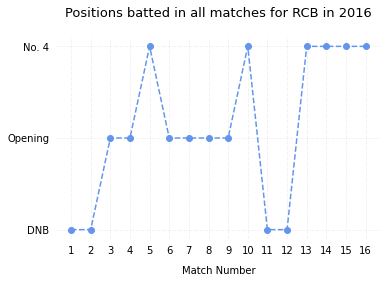

In [21]:
matches=[0,0,1,1,2,1,1,1,1,2,0,0,2,2,2,2]
match_no=[x for x in range(1,17)]
fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])

ax.plot(match_no,matches,marker='o',linestyle='--',color='#6495ed')

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
    
ax.set_xlabel('Match Number',labelpad=10)
ax.set_xticks(match_no)
ax.set_yticks([0,1,2])
ax.set_yticklabels(['DNB','Opening','No. 4'])

fig_title='Positions batted in all matches for RCB in 2016'
ax.text(0.5, 1.1, fig_title,horizontalalignment='center',fontsize=13,transform = ax.transAxes)
plt.savefig('graphs/Positions batted in all matches for RCB in 2016.png',dpi=300)

In [22]:
pos=[1,2,4]
runs_pos=[]
balls_pos=[]
for p in pos:
    d=df_rcb[df_rcb['position']==p]
    s=d['score'].sum()
    b=d['balls'].sum()
    runs_pos.append(s)
    balls_pos.append(b)

In [23]:
df_rcb

,score,balls,position,out,year
0,38,35,2,1,2016
1,52,32,1,1,2016
2,0,0,-1,0,2016
3,23,14,2,1,2016
4,42,25,2,1,2016
5,0,0,-1,0,2016
6,11,9,4,1,2016
7,0,1,4,1,2016
8,38,23,4,1,2016
9,51,35,4,0,2016


In [24]:
print(runs_pos)
print(balls_pos)

[52, 161, 184]
[32, 112, 127]


In [25]:
pos=['Opening','No. 4']
pos_runs=[52+161,184]

<ipython-input-26-574324409faf>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,3,4,6,7,8,9])


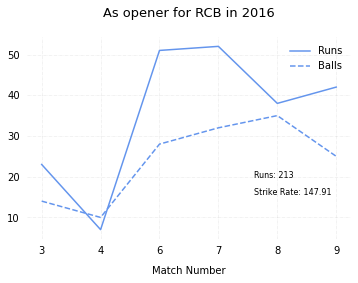

In [26]:
runs_open=[23,7,51,52,38,42]
balls_open=[14,10,28,32,35,25]

fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])

line1=ax.plot(runs_open,linestyle='-',color='#6495ed')
line2=ax.plot(balls_open,linestyle='--',color='#6495ed')

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
    
ax.set_xlabel('Match Number',labelpad=10)
ax.set_xticklabels([1,3,4,6,7,8,9])

ax.legend((line1[0],line2[0]),('Runs', 'Balls'),frameon=False)

fig_title='As opener for RCB in 2016'
ax.text(0.5, 1.1,fig_title,horizontalalignment='center',fontsize=13,transform = ax.transAxes)

ax.text(0.7, 0.3,'Runs: 213',horizontalalignment='left',fontsize=8,transform = ax.transAxes)
ax.text(0.7, 0.22,'Strike Rate: 147.91',horizontalalignment='left',fontsize=8,transform = ax.transAxes)

plt.savefig('graphs/As opener for RCB in 2016.png',dpi=300)

In [27]:
f=open(path+'/'+matches_2021[0],)
data=json.load(f)
data

{'meta': {'data_version': '1.0.0', 'created': '2021-05-01', 'revision': 1},
 'info': {'balls_per_over': 6,
  'city': 'Ahmedabad',
  'dates': ['2021-04-30'],
  'event': {'name': 'Indian Premier League', 'match_number': 26},
  'gender': 'male',
  'match_type': 'T20',
  'officials': {'match_referees': ['Shakti Singh'],
   'reserve_umpires': ['YC Barde'],
   'tv_umpires': ['J Madanagopal'],
   'umpires': ['S Ravi', 'VK Sharma']},
  'outcome': {'winner': 'Punjab Kings', 'by': {'runs': 34}},
  'overs': 20,
  'player_of_match': ['Harpreet Brar'],
  'players': {'Punjab Kings': ['KL Rahul',
    'P Simran Singh',
    'CH Gayle',
    'N Pooran',
    'DJ Hooda',
    'M Shahrukh Khan',
    'Harpreet Brar',
    'RP Meredith',
    'Ravi Bishnoi',
    'Mohammed Shami',
    'CJ Jordan'],
   'Royal Challengers Bangalore': ['V Kohli',
    'D Padikkal',
    'RM Patidar',
    'GJ Maxwell',
    'AB de Villiers',
    'Shahbaz Ahmed',
    'DR Sams',
    'KA Jamieson',
    'HV Patel',
    'Mohammed Siraj',
   

In [28]:
players_lst=[]
runs_lst=[]
balls_lst=[]
def get_runs_avg(year):
    for file in jsonfiles:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        split=date[0].split('-')
        year_str=split[0]
        year_int=int(year_str)
        if year_int!=year:
            continue
        teams=info.get('players')
        players_open=[]
        for team in teams:
            for i in range(0,2):
                bat=teams[team][i]
                if bat not in players_lst:
                    players_lst.append(bat)
                    runs_lst.append(0)
                    balls_lst.append(0)
                players_open.append(bat)
        innings=data.get('innings')
        for i in range(0,2):
            inning=innings[i]
            overs=inning.get('overs')
            for over in overs:
                for delivery in over.get('deliveries'):
                    batter=delivery.get('batter')
                    if batter in players_open:
                        idx=players_lst.index(batter)
                        runs=delivery.get('runs')
                        if delivery.get('extras') and delivery.get('extras').get('wides'):
                                continue
                        index=players_lst.index(batter)
                        runs_lst[idx]=runs_lst[idx]+runs.get('batter')
                        balls_lst[idx]=balls_lst[idx]+1

In [29]:
get_runs_avg(2018)
get_runs_avg(2019)
get_runs_avg(2020)
get_runs_avg(2021)

In [30]:
df_final=pd.DataFrame({'Players':players_lst,'Runs':runs_lst,'Balls':balls_lst})
df_final.head()

,Players,Runs,Balls
0,RG Sharma,1144,902
1,E Lewis,533,369
2,SR Watson,1166,849
3,AT Rayudu,430,325
4,C Munro,63,41


In [31]:
df_final.shape
df_final['Strike Rate']=df_final['Runs']*100/df_final['Balls']

In [32]:
df_final.head()

,Players,Runs,Balls,Strike Rate
0,RG Sharma,1144,902,126.829268
1,E Lewis,533,369,144.444444
2,SR Watson,1166,849,137.338045
3,AT Rayudu,430,325,132.307692
4,C Munro,63,41,153.658537


In [33]:
df_final.sort_values(by=['Runs'],ascending=False,inplace=True)

In [34]:
df_top10=df_final.iloc[0:10]
df_top10

,Players,Runs,Balls,Strike Rate
6,KL Rahul,2548,1823,139.769611
15,S Dhawan,2223,1645,135.136778
9,Q de Kock,1530,1174,130.323680
25,F du Plessis,1467,1111,132.043204
41,DA Warner,1388,1036,133.976834
30,PP Shaw,1305,892,146.300448
2,SR Watson,1166,849,137.338045
35,Shubman Gill,1154,943,122.375398
0,RG Sharma,1144,902,126.829268
33,JC Buttler,1136,725,156.689655


In [35]:
players_10=list(df_top10['Players'])
players_10.reverse()
runs_10=list(df_top10['Runs'])
runs_10.reverse()
sr_10=list(df_top10['Strike Rate'])
sr_10.reverse()

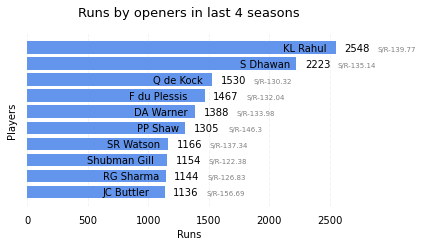

In [36]:
from matplotlib.lines import Line2D

fig=plt.figure()
ax=fig.add_axes([0.05,0.15,0.75,0.6])

ax.grid(b=True, color='grey', linestyle='-.',linewidth=0.5, alpha=0.2,zorder=0)

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)

ax.set_xlabel('Runs')
ax.set_ylabel('Players',labelpad=10)
ax.set_yticks([])
fig_title='Runs by openers in last 4 seasons'
ax.text(0.5, 1.10,fig_title,horizontalalignment='center',fontsize=13,transform=ax.transAxes)

def autolabel(rects):
    for idx,rect in enumerate(rects):
        width=rect.get_width()
        height=rect.get_height()
        y=rect.get_y()
        player=players_10[idx]
        sr=sr_10[idx]
        sr=float("{:.2f}".format(sr))
        sr=str(sr)
        length=len(player)
        ax.text(width+175,y+0.075, '%d' % int(width),ha='center',va='bottom')
        ax.text(width-length*32,y+0.075, '%s' % str(player),ha='center',va='bottom')
        ax.text(width+500,y+0.15, '%s' % str('S/R-'+sr),ha='center',va='bottom',fontsize=7,color='grey')

rects=ax.barh(players_10,runs_10,height=0.8,label='Runs',align='center',color='#6495ed',zorder=3)
autolabel(rects)
# plt.tight_layout()
plt.savefig('graphs/Runs vs Positions bar of openers.jpg',dpi=300)
plt.show()

In [37]:
bat='KL Rahul'
def get_boundaries(year):
    sixes=0
    fours=0
    balls=0
    for file in jsonfiles:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        split=date[0].split('-')
        year_str=split[0]
        year_int=int(year_str)
        if year_int!=year:
            continue
        teams=info.get('players')
        players_open=[]
        found=False
        for team in teams:
            if batsman in teams[team]:
                found=True
        if found==False:
            continue
        innings=data.get('innings')
        for i in range(0,2):
            inning=innings[i]
            overs=inning.get('overs')
            for over in overs:
                for delivery in over.get('deliveries'):
                    batter=delivery.get('batter')
                    if batter==batsman:
                        runs=delivery.get('runs')
                        if delivery.get('extras') and delivery.get('extras').get('wides'):
                                continue
                        run=runs.get('batter')
                        if run==6:
                            sixes=sixes+1
                        if run==4:
                            fours=fours+1
                        balls=balls+1
    return [sixes,fours,balls]

In [38]:
b_2016=get_boundaries(2016)
b_2018=get_boundaries(2018)
b_2019=get_boundaries(2019)
b_2020=get_boundaries(2020)
b_2021=get_boundaries(2021)

In [39]:
sixes=[int(b_2016[2]/b_2016[0]),int(b_2018[2]/b_2018[0]),int(b_2019[2]/b_2019[0]),
       int(b_2020[2]/b_2020[0]),int(b_2021[2]/b_2021[0])]
fours=[int(b_2016[2]/b_2016[1]),int(b_2018[2]/b_2018[1]),int(b_2019[2]/b_2019[1]),
       int(b_2020[2]/b_2020[1]),int(b_2021[2]/b_2021[1])]
print(fours,sixes)

[7, 6, 8, 8, 9] [16, 13, 17, 22, 15]


<ipython-input-40-23d09cc84492>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',2016,'',2018,'',2019,'',2020,'',2021])


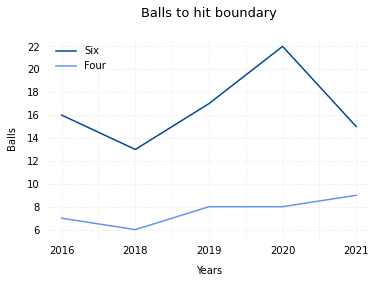

In [40]:
fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])

years=[y for y in range(2018,2022)]
years.append(2016)
years.sort()

line2=ax.plot(fours,linestyle='-',color='#6495ed')
line1=ax.plot(sixes,linestyle='-',color='#004896')

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
    
ax.set_xlabel('Years',labelpad=10)
ax.set_ylabel('Balls',labelpad=10)
ax.set_xticklabels(['',2016,'',2018,'',2019,'',2020,'',2021])

ax.legend((line1[0],line2[0]),('Six', 'Four'),frameon=False)

fig_title='Balls to hit boundary'
ax.text(0.5, 1.1,fig_title,horizontalalignment='center',fontsize=13,transform = ax.transAxes)


plt.savefig('graphs/Boundary hitting abiltiy.png',dpi=300)

In [41]:
players=[]
runs_total=[]
thirties=[]
fifties=[]
hundreds=[]
def get_rec_scores(year):
    for file in jsonfiles:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        split=date[0].split('-')
        year_str=split[0]
        year_int=int(year_str)
        if year_int!=year:
            continue
        teams=info.get('players')
        players_all=[]
        runs_all=[]
        for team in teams:
            for i in range(0,11):
                bat=teams[team][i]
                if bat not in players:
                    players.append(bat)
                    runs_total.append(0)
                    hundreds.append(0)
                    fifties.append(0)
                    thirties.append(0)
                players_all.append(bat)
                runs_all.append(0)
        innings=data.get('innings')
        for i in range(0,2):
            inning=innings[i]
            overs=inning.get('overs')
            for over in overs:
                for delivery in over.get('deliveries'):
                    batter=delivery.get('batter')
                    if batter in players_all:
                        idx=players_all.index(batter)
                        runs=delivery.get('runs')
                        if delivery.get('extras') and delivery.get('extras').get('wides'):
                                continue
                        index=players_all.index(batter)
                        runs_all[index]=runs_all[index]+runs.get('batter')
        for (p,r) in zip(players_all,runs_all):
            idx=players.index(p)
            if r>=30:
                thirties[idx]=thirties[idx]+1
            if r>=50:
                fifties[idx]=fifties[idx]+1
            if r>=100:
                hundreds[idx]=hundreds[idx]+1
            runs_total[idx]=runs_total[idx]+r

In [42]:
get_rec_scores(2018)
get_rec_scores(2019)
get_rec_scores(2020)
get_rec_scores(2021)

In [43]:
df_scores=pd.DataFrame({'Players':players,'Thirties':thirties,'Fifties':fifties,'Hundreds':hundreds,'Runs':runs_total})
df_scores.head()

,Players,Thirties,Fifties,Hundreds,Runs
0,RG Sharma,21,8,0,1404
1,E Lewis,9,3,0,581
2,Ishan Kishan,14,8,0,1133
3,SA Yadav,26,12,0,1733
4,HH Pandya,13,3,0,1070


In [44]:
df_scores.shape

(263, 5)

In [45]:
df_sorted=df_scores.sort_values(by=['Runs'],ascending=False)
df_sorted

,Players,Thirties,Fifties,Hundreds,Runs
33,KL Rahul,32,25,2,2548
78,S Dhawan,33,18,2,2223
26,RR Pant,28,13,1,1934
46,V Kohli,28,13,1,1865
3,SA Yadav,26,12,0,1733
...,...,...,...,...,...
173,SC Kuggeleijn,0,0,0,0
238,Jalaj S Saxena,0,0,0,0
239,LI Meriwala,0,0,0,0
171,JP Behrendorff,0,0,0,0


In [46]:
df_top10=df_sorted.iloc[0:10]
df_top10

,Players,Thirties,Fifties,Hundreds,Runs
33,KL Rahul,32,25,2,2548
78,S Dhawan,33,18,2,2223
26,RR Pant,28,13,1,1934
46,V Kohli,28,13,1,1865
3,SA Yadav,26,12,0,1733
47,AB de Villiers,22,18,0,1689
68,SV Samson,22,10,2,1642
114,F du Plessis,25,14,0,1640
24,SS Iyer,23,10,0,1568
45,Q de Kock,20,11,0,1530


In [47]:
p_lst=list(df_top10['Players'])
t_lst=list(df_top10['Thirties'])
f_lst=list(df_top10['Fifties'])
h_lst=list(df_top10['Hundreds'])

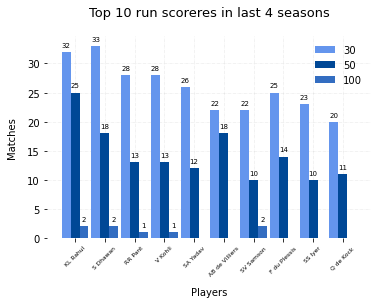

In [48]:
x=np.arange(len(p_lst)) #the label locations
w=0.3 #the width of the bars

fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])

rects1 = ax.bar(x-w,t_lst,w,color='#6495ed',zorder=3)
rects2 = ax.bar(x,f_lst,w,color='#004896',zorder=3)
rects3 = ax.bar(x+w,h_lst,w,color='#336dc1',zorder=3)

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('Players',labelpad=10)
ax.set_ylabel('Matches',labelpad=10)

ax.set_xticks(x)
ax.set_xticklabels(p_lst,fontsize=6,rotation=45)

ax.legend((rects1[0],rects2[0],rects3[0]),('30','50','100'),frameon=False)

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        if height==0:
            continue
        ax.text(rect.get_x() + rect.get_width()/2., 0.7+height,'%d' % int(height),ha='center',va='bottom',fontsize=7)

fig_title='Top 10 run scoreres in last 4 seasons'
ax.text(0.5, 1.10,fig_title,horizontalalignment='center',fontsize=13,transform=ax.transAxes)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig('graphs/Top 10 run scoreres in last 4 seasons.png',dpi=300)

plt.show()